<a href="https://colab.research.google.com/github/japgarrido/Reconocimiento-digitos/blob/main/Reconocimiento_de_d%C3%ADgitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimiento de dígitos con Inteligencia Artificial

**Autor**: Jose Ángel Pérez Garrido
- Investigador (AtlanTTic Research Center)

Con este tutorial se pretende obtener un manejo básico de Google Colab así como de creación de redes neuronales sencillas mediante un ejercicio de reconocer dígitos en imágenes en blanco y negro.

# Experimenta con Google Colab

**Colab es una versión en la nube de los Jupyter Notebooks**, una herramienta muy usada en ciencia de datos y programación. Esto significa que puedes escribir y ejecutar código directamente desde tu navegador, sin necesidad de instalar nada en tu ordenador.

Colab (al igual que un Jupyter notebook) funciona con ***celdas***, cada celda es un espacio aislado para escribir. Hay celdas de texto (esta misma) y celdas de código (la de abajo), donde podemos programar y ejecutar código en ***Python***.

In [ ]:
print("hola mundo")

Para ***ejecutar*** una celda de código, basta poner el cursor en la celda y tocar el botón de "play" o presionar ***shift*** + ***enter*** en el teclado. Ejecutada la celda, aparecerá debajo el "output" o lo que devuelve el código que se ejecutó.

Las variables se mantienen en memoria hasta que se apague o reinicie el entorno de ejecución de Google Colab, y se puede acceder a ellas desde otras celdas.

In [ ]:
variable = 3

In [ ]:
print(variable)

**Para practicar**: En la siguiente celda crea una función (de nombre suma) que le sume un valor recibido como parámetro a una variable también recibida por parámetro y devuelva el resultado. Es decir, la función suma recibe los parámetros `variable, suma` y devuelve `variable+suma`.

Luego, llama a dicha función con la variable (`variable`) anterior e imprime el resultado por pantalla.

In [ ]:
# ES TU TURNO: Introduce tu código aquí

Ahora que ya dominas lo básico de Google Colab pasemos a la tarea.

# Reconocimiento de dígitos escritos a mano

## OBJETIVO

Nuestro objetivo es construir y entrenar una red neuronal artificial con miles de imágenes de dígitos escritos a mano para que pueda **identificar un dígito** correctamente en nuevas imágenes que **no haya visto antes**.

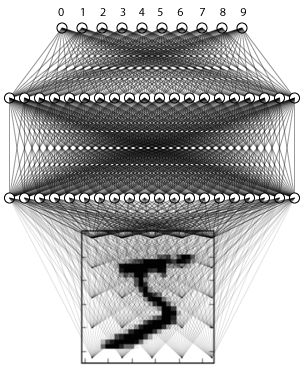


Los datos que se usarán para entrenar el modelo son la base de datos [MNIST](https://keras.io/api/datasets/mnist/), que contiene 60.000 imágenes para entrenamiento y 10.000 imágenes de prueba con dígitos escritos a mano (del 0 al 9). Cada imagen se representa en escala de grises y tiene un tamaño de 28 píxeles de ancho por 28 píxeles de alto.

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

Utilizaremos la API de [Keras](https://keras.io/) para Python. Keras es una API de alto nivel para crear y entrenar modelos de aprendizaje profundo. También usaremos [NumPy](https://numpy.org/), una biblioteca fundamental para la computación científica en Python que permite trabajar de forma eficiente con vectores y matrices de datos.

## Ranking

Para hacerlo más divertido haremos una **minicompetición**. Escribe el nombre que aparecerá en el ranking a continuación. Este nombre se usará para identificar tu resultado en la tabla de clasificación (leaderboard), donde veremos quién entrena el mejor modelo.

In [ ]:
YOUR_NAME="estudiante_001" # ESCRIBE TU NOMBRE AQUÍ PARA EL RANKING

(Recuerda que debes ejecutar todas las celdas que contengan código como la anterior)

## Prerrequisitos - módulos Python

Primero, es necesario cargar librerías en el entorno de Python. Ejecuta las siguientes celdas en tu entorno.

In [ ]:
# pip es una herramienta que se usa para instalar y gestionar paquetes (librerías) en Python.
!pip install -q gradio
!pip install wandb

In [ ]:
import numpy as np                   # librería matemática para trabajar con matrices
import matplotlib.pyplot as plt      # para generar diagramas
import random                        # para generar números aleatorios
import keras                         # framework de aprendizaje máquina
import gradio as gr                  # para generar una interfaz web básica
import os                            # funciones del sistema operativo

from keras.datasets import mnist     # el conjunto de datos MNIST
from keras.models import Sequential  # el esqueleto del modelo de IA

from keras.layers import Input, Dense, Dropout, Activation # Capas del modelo
from keras.utils import to_categorical                     # Otras funciones

# para el ranking:
import wandb
from wandb.integration.keras import WandbMetricsLogger

os.environ["WANDB_MODE"] = "online"
os.environ["WANDB_ANONYMOUS"] = "must"
wandb.init(project="Reconocimiento-digitos", entity="jpgarrido19", name=YOUR_NAME)

print('Keras version:', keras.__version__)

## Carga de datos de entrenamiento

El conjunto de datos MNIST está integrado en Keras y podemos analizar fácilmente algunas de sus características en Python. Cada imagen de MNIST se representa como una matriz de 28x28 números.

- Cada número en la matriz representa un nivel de gris (es decir, cuán claro u oscuro es ese píxel).

- El valor va de 0 a 255:

  - 0 es negro (píxel apagado)
  - 255 es blanco (píxel completamente encendido)
  - Los valores intermedios representan diferentes tonos de gris

Al cargar el dataset usando Keras, obtenemos dos conjuntos en variables de Numpy: uno para entrenamiento y otro para prueba. Esto se hace automáticamente con la siguiente instrucción:

In [ ]:
# Los datos de MNIST data se dividen entre 60000 imágenes de entrenamiento de 28 x 28 píxeles y 10000 imágenes de 28 x 28 píxeles
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Tipo de variable:\n{type(X_train)=}\n{type(y_train)=}\n{type(X_test)=}\n{type(y_test)=}\n")

print("Forma de los datos de entrenamiento de entrada (X_train):", X_train.shape)
print("Forma de las etiquetas entrenamiento (y_train):", y_train.shape)

print("Forma de los datos de prueba de entrada (X_test):", X_test.shape)
print("Forma de las etiquetas de prueba (y_test):", y_test.shape)

Aquí, `X_train` contiene las imágenes que usaremos para entrenar el modelo, mientras que `y_train` contiene las etiquetas correspondientes, es decir, los dígitos del 0 al 9 que aparecen en cada imagen. De manera similar, `X_test` y `y_test` representan las imágenes y etiquetas del conjunto de prueba.

Cada entrada en `X_train` es una matriz de 28x28, donde cada elemento indica el nivel de gris de un píxel específico. Esto quiere decir que X_train es un arreglo de forma (60000, 28, 28), es decir, 60,000 imágenes de 28 por 28 píxeles. Por su parte, `X_test` contiene 10,000 imágenes más que se reservan para evaluar el desempeño del modelo una vez que ha sido entrenado.

Esta **subdivisión en conjunto de entrenamiento y conjunto de prueba** es **fundamental** en el desarrollo de modelos de inteligencia artificial, ya que nos permite entrenar el modelo con un subconjunto de los datos, y luego evaluar qué tan bien generaliza usando ejemplos que no ha visto antes. Así evitamos sobreajustar el modelo a los datos de entrenamiento y podemos tener una medida más confiable de su rendimiento real.

Usando matplotlib, podemos dibujar algunas imágenes de muestra del conjunto de entrenamiento directamente en este Jupyter Notebook.

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Hacer las imágenes un poco más grandes

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Número {}".format(y_train[num]))

plt.tight_layout()

Examinemos un solo dígito un poco más de cerca e imprimamos la matriz que representa el último dígito.

In [ ]:
# pequeña función para imprimir de forma bonita una matriz
def matprint(mat, fmt="g"):
    matriz = np.copy(mat)
    # Si la matriz es un vector (lista unidimensional), convertirlo en una "matriz de una sola fila"
    if len(np.shape(matriz)) == 1:
        matriz = [matriz]

    # Para cada columna, encontramos el ancho máximo de los valores formateados
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in np.array(matriz).T]

    # Imprimir los valores de la "matriz" (o vector tratado como fila)
    for x in matriz:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# print!
matprint(X_train[num])

Cada píxel es un entero de 8 bits de 0 a 255. 0 es negro puro, mientras que 255 es blanco puro. Esto es lo que llamamos un píxel de un solo canal, o píxel monocromático.

*¡Dato curioso! La pantalla de tu ordenador tiene tres canales para cada píxel: rojo, verde y azul. Cada uno de estos canales probablemente también acepte un entero de 8 bits. 3 canales, 24 bits en total, ¡16.777.216 colores posibles!*

---

## Preprocesamiento de datos

Uno de los pasos más fundamentales en cualquier proyecto de inteligencia artificial es el **preprocesamiento** de los datos. Este proceso es crucial para garantizar que el modelo pueda aprender y generalice correctamente.

Aunque a simple vista pueda parecer que este dataset está "listo para usar", en realidad, las redes neuronales no entienden directamente imágenes como las ve un humano. Necesitan que esa información se transforme a un formato y escala adecuados. Por ejemplo, cada imagen se representa como una **matriz 2D**, pero muchas arquitecturas de redes neuronales, especialmente las más simples, requieren que los datos se introduzcan como **vectores**.

## Formateo de la capa de datos de entrada

Veamos cómo hacer esto. En lugar de una matriz de 28 x 28, nuestra red acepta un vector de longitud 784.

Por tanto, **cada imagen que le pasemos al modelo** debe ser remodelada (o aplanada) para formar un vector. También normalizaremos las entradas para que estén en el rango [0-1] en lugar de [0-255]. Generalmente, se recomienda normalizar las entradas para que cualquier dimensión adicional (para otras arquitecturas de red) tenga la misma escala.

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

Primero, usaremos el método `.reshape(...)` ([Numpy Documentation](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)) para transformar cada imagen de 28x28 píxeles (es decir, una matriz 2D) en un vector plano de 784 elementos. Al aplicar `X_train.reshape(60000, 784)`, estamos simplemente diciendo: “toma cada una de las 60,000 imágenes y aplánala en un vector de 784 posiciones”.

Luego, se utiliza `.astype('float32')` ([Numpy Documentation](https://numpy.org/doc/2.1/reference/generated/numpy.ndarray.astype.html)) para convertir los datos de tipo entero a números decimales de 32 bits. Esta conversión es importante porque durante el entrenamiento, las redes neuronales realizan cálculos con muchos decimales, y trabajar con enteros limitaría la precisión de los resultados.

Finalmente, normalizamos los datos dividiendo por 255 (`X_train /= 255`). Recordemos que los valores de los píxeles originalmente van de 0 a 255. Al dividir todos los valores entre 255, los convertimos al rango [0, 1], lo cual facilita mucho el proceso de entrenamiento: los modelos aprenden más rápido y de forma más estable cuando los datos de entrada están dentro de un rango acotado y consistente.

In [ ]:
# ES TU TURNO: Introduce tu código aquí
#X_train =

¿Todo correcto? Veamos cómo queda la matriz del dígito que veíamos antes.

In [ ]:
# print!
print("Forma de una muestra: ",X_train[num].shape)
matprint(X_train[num])

print("Forma de los datos de entrenamiento:", X_train.shape)

Si los datos han quedado bien preprocesados continúa al siguiente punto.

## Etiquetas
Cada imagen viene con una etiqueta (label), que es un número del 0 al 9 que indica qué dígito representa la imagen. Las etiquetas se guardan en la variables `y_train` e `y_test`.
Por ejemplo:

- Imagen 1: X_train[0]: píxeles 28x28 de un 3 → y_train[0]: 3
- Imagen 2: X_train[1]: píxeles 28x28 de un 7 → y_train[1]: 7

In [ ]:
print("Forma de las etiquetas de entrenamiento (y_train)", y_train.shape)
print("Forma de las etiquetas (y_test)", y_test.shape)

print("Ejemplo de etiqueta:", y_train[num])

## Formateo de las etiquetas (salida esperada)

El modelo de redes neuronales necesita que nuestras clases (dígitos) estén en formato one-hot, es decir,

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

Si el resultado final de nuestra red es muy cercano a una de estas clases, lo más probable es que sea esa clase. Por ejemplo, si el resultado final de nuestra red es:

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```


Entonces lo más probable es que la imagen sea la del dígito `1`.

Para procesar las etiquetas del dataset MNIST y convertirlas a formato one-hot en Keras existe la función [`to_categorical`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical). Realiza esta conversión a continuación y almacena el resultado en las variables `Y_train` e `Y_test`.

In [ ]:
# Escribe tu código aquí
#Y_train =
#Y_test =

In [ ]:
print("Ejemplo de etiqueta:", Y_train[num])

# Construcción de una red neuronal

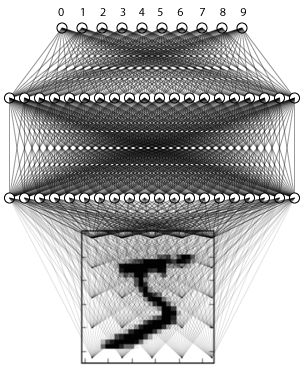

La clase [Sequential](https://keras.io/guides/sequential_model/) de Keras es una pila lineal de capas que se añaden llamando a `.add(...)` pasando como parámetro un objeto capa de Keras. Crea a continuación tu modelo instanciando un objeto Sequential vacío (`Sequential()`) en la variable `modelo`.

In [ ]:
# Escribe tu código aquí
#modelo =

## Añadir la capa de entrada

La capa [`Input`](https://keras.io/api/layers/core_layers/input/) en Keras es utilizada para definir la entrada de un modelo de red neuronal. Esta capa no realiza ningún cálculo, sino que simplemente especifica las dimensiones de los datos que se van a introducir en el modelo.

```python
Input(shape=(100,)) #(100,) no es un error: ¡representa un vector de longitud 100!
```

Añade a tu modelo una capa Input como la anterior, asegurándote de que la dimensión de entrada se corresponde con la de tus datos.

In [ ]:
# Escribe tu código aquí
#modelo.add(

## Añadir una capa de procesamiento

La capa densa ([Dense](https://keras.io/api/layers/core_layers/dense/)) es una de las capas más comunes en redes neuronales. También se llama "fully connected layer" porque cada neurona de la capa está conectada a todas las neuronas de la capa anterior.

Cada neurona calcula una combinación lineal de las entradas, más un sesgo (bias), y luego se aplica una función de activación.

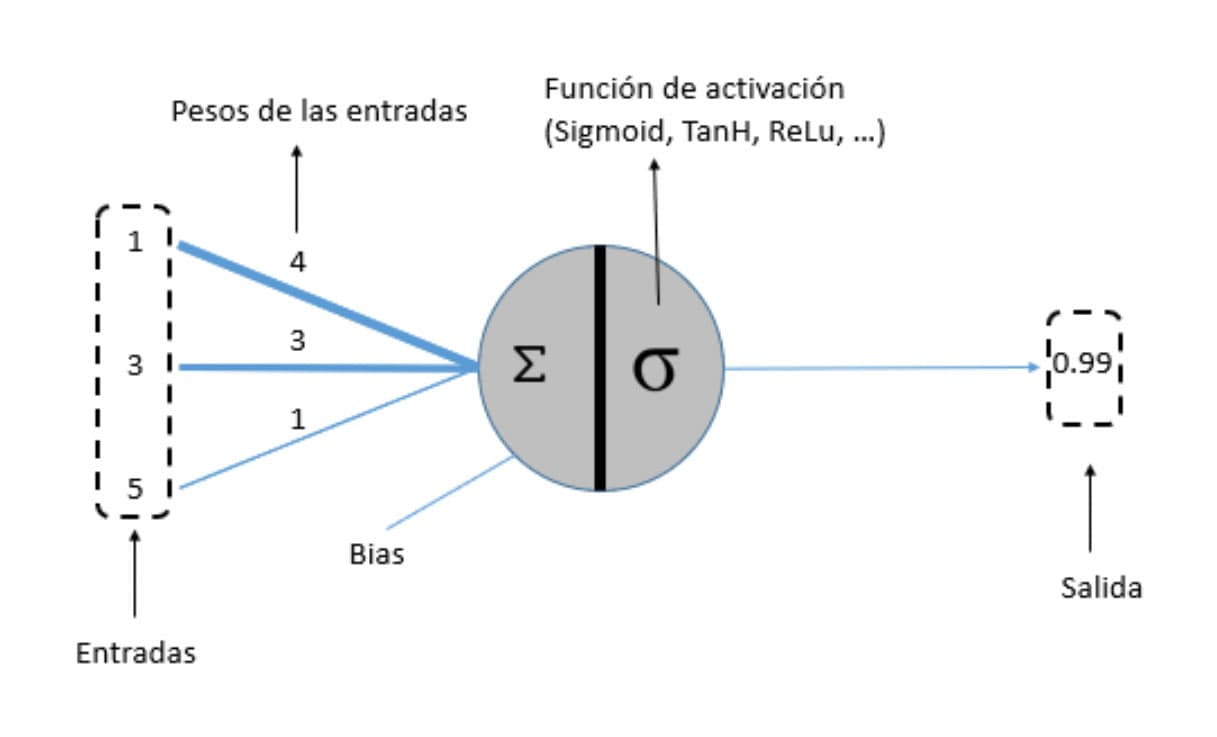

Se usa para aprender relaciones complejas o patrones entre las características de entrada.

```python
# Esta capa se compone de un conjunto de 20 nodos (neuronas artificiales).
# Cada nodo recibirá un elemento de cada vector de entrada y le aplicará un peso.
Dense(20, activation="relu")
```

Añade a tu modelo una capa Dense como la anterior.

In [ ]:
# Escribe tu código aquí


## Añadir la capa de salida
La capa de salida es la última capa de la red neuronal y también es una **capa densa** (`Dense`). Su configuración depende del problema que estamos resolviendo. En un problema de clasificación de dígitos del 0 al 9, por ejemplo, necesitamos **10 neuronas**: una para cada posible número.

Esta capa usa una función de activación llamada **softmax**. ¿Por qué? Porque softmax convierte los valores de salida en probabilidades, es decir, en números entre 0 y 1 que suman 1. Esto nos permite saber qué tan probable es que la red piense que la imagen corresponde a cada número.

Por ejemplo, antes de aplicar softmax, la salida de la red podría ser algo como:
`[2.1, 1.2, 0.3, 5.6, 3.3, 0.1, 1.8, 0.0, 2.5, 1.0]`.
Estos valores no se pueden interpretar fácilmente. Pero si aplicamos softmax, obtenemos algo como:
`[0.03, 0.01, 0.005, 0.8, 0.1, 0.002, 0.02, 0.001, 0.03, 0.002]`
Ahora podemos ver que la red cree, con un 80% de probabilidad, que la imagen representa un "3".

Gracias a softmax, podemos interpretar de forma clara cuál es la clase que la red considera más probable.

Puedes usar softmax cambiando la función de activación de la siguiente manera:

```python
activation="softmax"
```

Añade a tu modelo una capa Dense de salida adecuada.

In [ ]:
# Escribe tu código aquí


## Compilación del modelo

Al compilar un modelo, Keras solicita especificar la **función de pérdida** (loss) y el **optimizador** (optimizer). La función de pérdida que usaremos se denomina *entropía cruzada categórica* (categorical_crossentropy) y es ideal para comparar dos distribuciones de probabilidad.

Nuestras predicciones son distribuciones de probabilidad a lo largo de los diez dígitos (p. ej., "estamos 80 % seguros de que esta imagen es un 3, 10 % seguros de que es un 8, 5 % de que es un 2, etc."), y el objetivo es una distribución de probabilidad con 100 % para la categoría correcta y 0 para todo lo demás. La entropía cruzada mide la diferencia entre la distribución predicha y la distribución objetivo. ([Más detalles en Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy))

El optimizador ayuda a determinar la velocidad de aprendizaje del modelo mediante el **descenso de gradiente** ([Más detalles](https://es.wikipedia.org/wiki/Descenso_del_gradiente)). La velocidad de descenso de un gradiente se denomina **tasa de aprendizaje**.

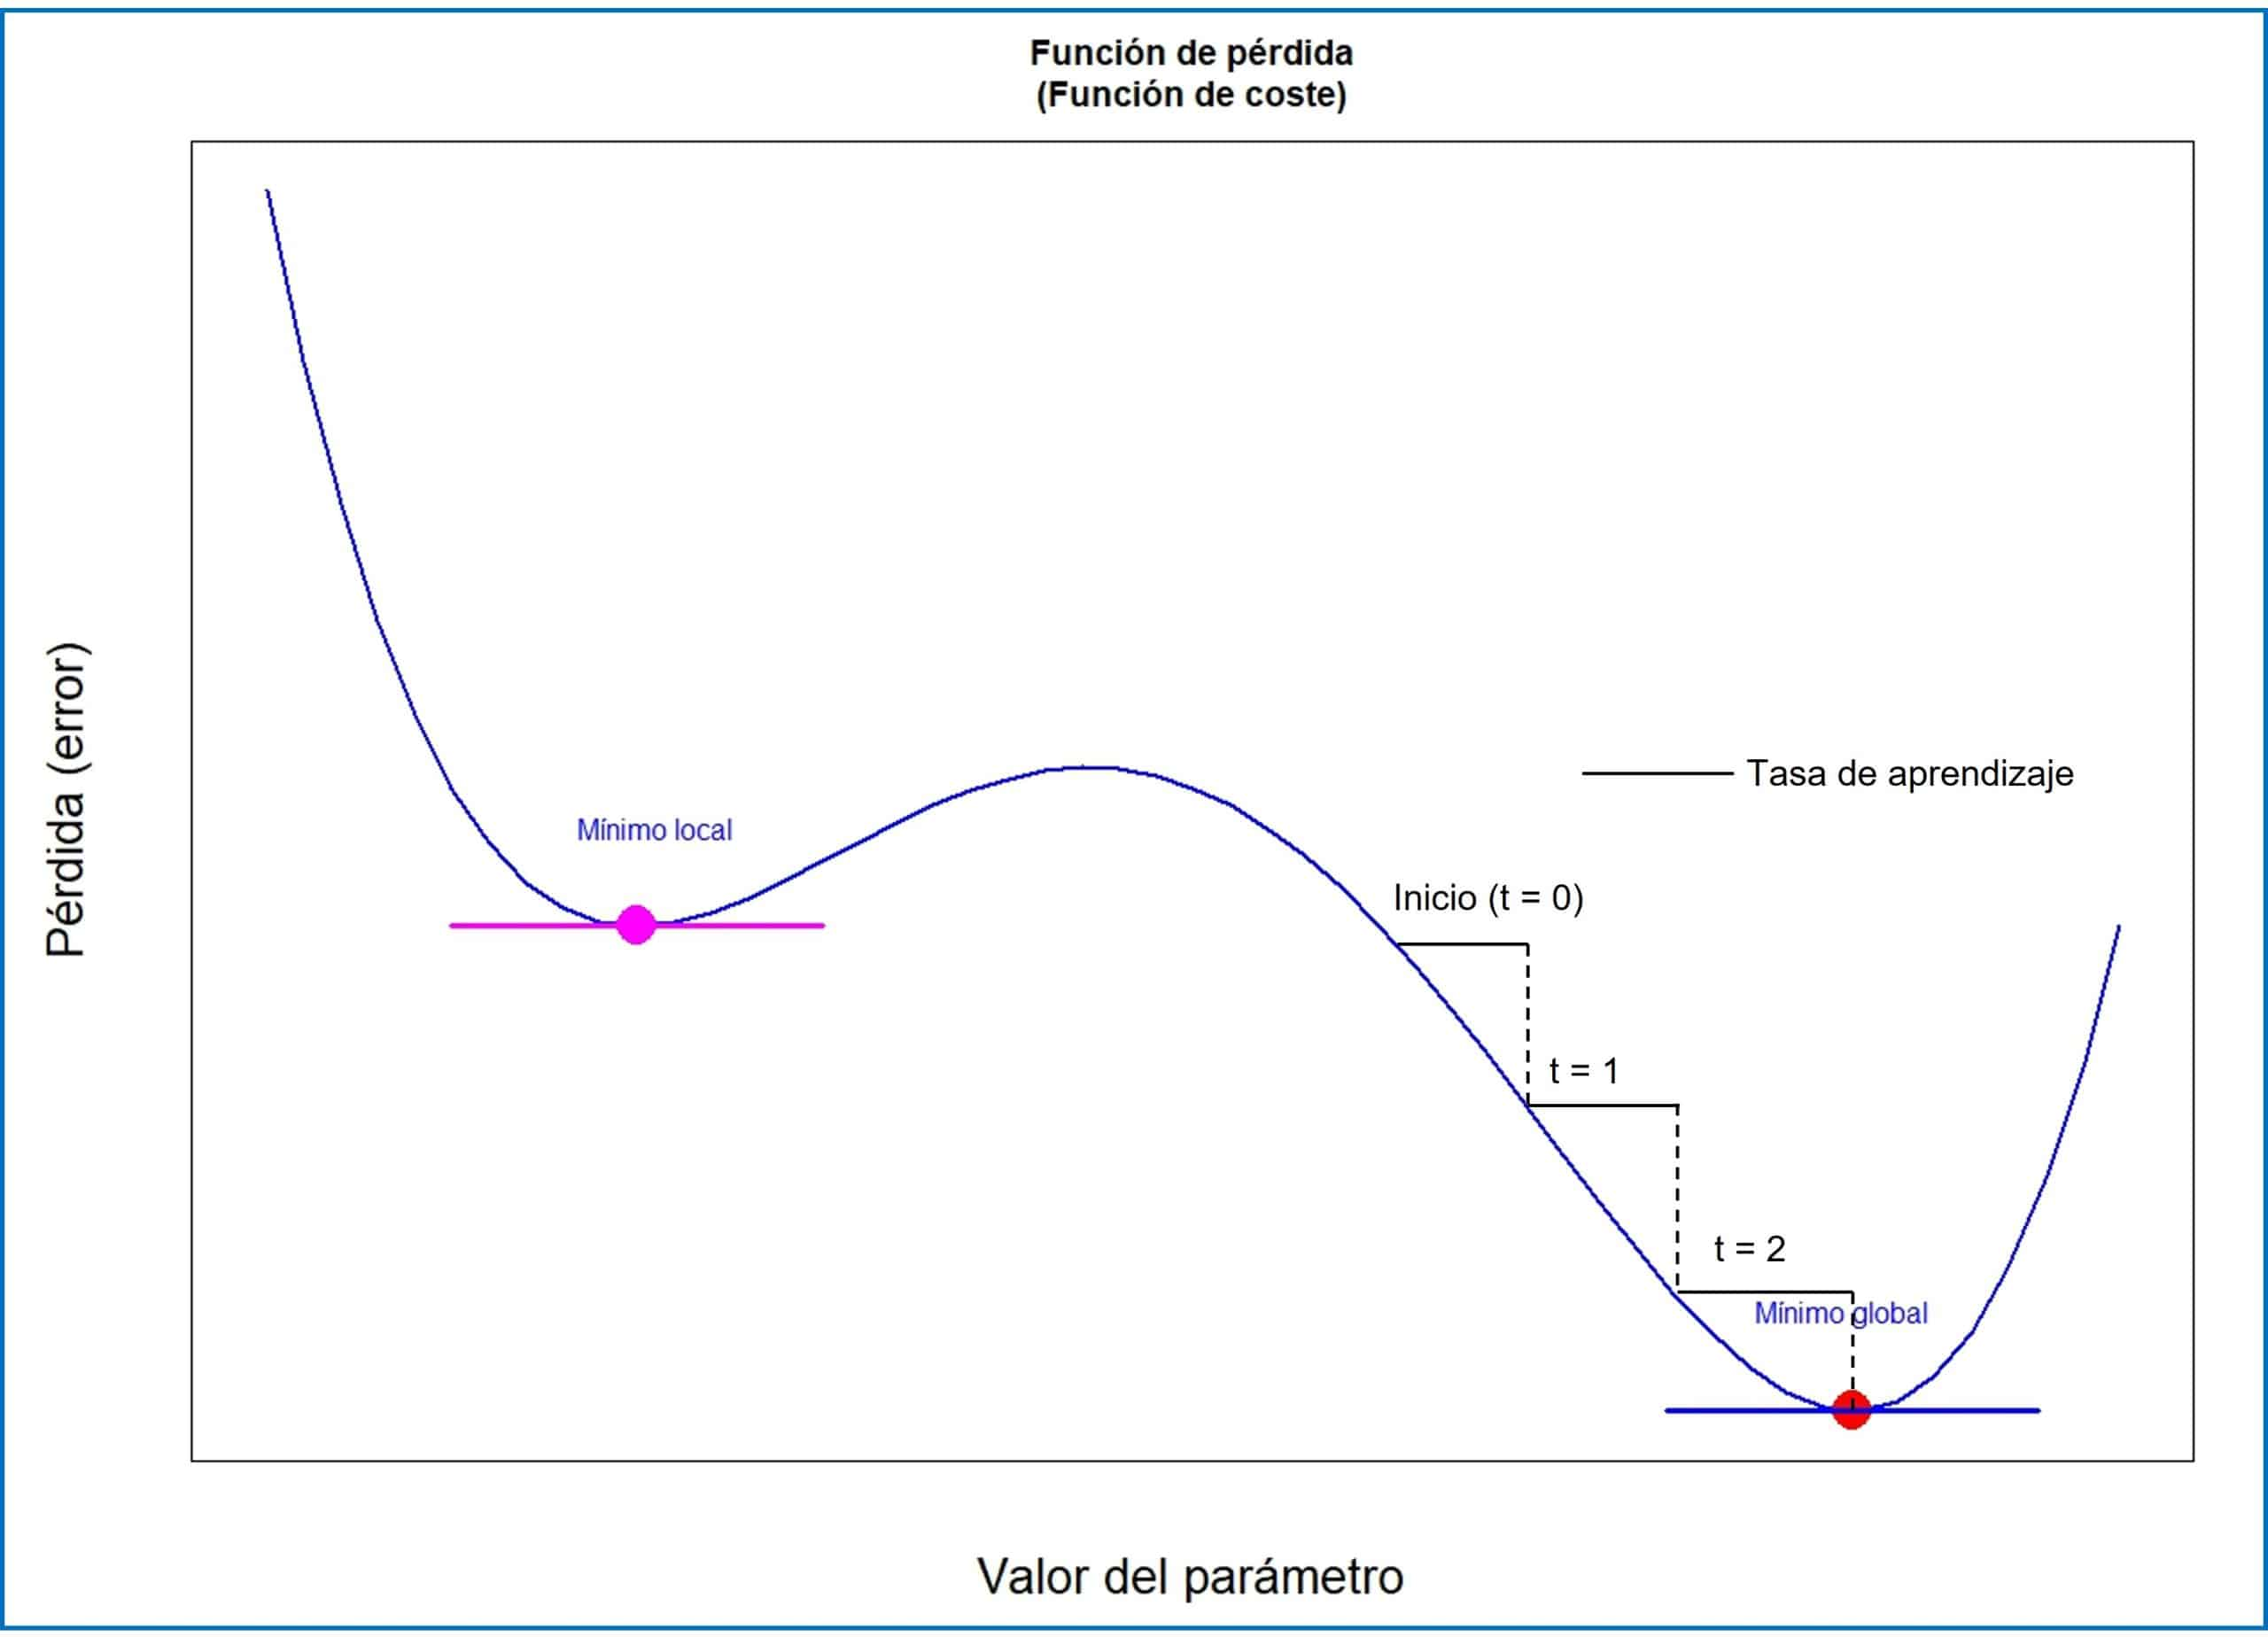

In [ ]:
# Usaremos el optimizador Adam (bastante común) para el entrenamiento
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo.summary()

## ¡Entrena el modelo!
¡Ahora viene la parte interesante!

El método `fit(...)` de Keras ([Keras documentation](https://keras.io/api/models/model_training_apis/)) se utiliza para entrenar un modelo. Dos de sus parámetros clave son `batch_size` y `epochs`.

- `batch_size`, o tamaño de lote, define cuántas muestras se usan en cada paso de entrenamiento para calcular la pérdida, los gradientes y los cambios en el modelo.
  - Tamaños de lote grandes aceleran el entrenamiento pero pueden llevar a soluciones menos óptimas al suavizar demasiado el paisaje de la función de pérdida.
  - Tamaños muy pequeños generan actualizaciones ruidosas, dificultando acercarse al mínimo de la función de pérdida.
  - Elegir un buen tamaño de lote suele requerir prueba y error.

- `epochs`, o épocas, indica cuántas veces el modelo verá todo el conjunto de entrenamiento. A más épocas, mayor exposición a los datos, pero también mayor riesgo de sobreajuste (memorizar los datos de entrenamiento) si se entrena en exceso.


In [ ]:
evolucion_entrenamiento = modelo.fit(
    X_train, Y_train,                            # X_train y Y_train es el conjunto de entrenamiento
    batch_size=128, epochs=5,
    callbacks=[WandbMetricsLogger()]             # callbacks=[WandbMetricsLogger()] permite enviar la información de entrenamiento al ranking
)

Los dos números, en orden, representan el valor de la función de pérdida de la red en el conjunto de entrenamiento y la precisión general de la red (entre 0-1, siendo 0 un 0% de precisión y 1 un 100% de precisión) en los datos de entrenamiento. Veamos cómo evolucionó la **pérdida** y la **precisión** durante el entrenamiento. Si el entrenamiento está funcionando correctamente se espera que el error se reduzca cada vez más en cada nueva época.

In [ ]:
# Crear una figura con dos subplots (uno encima del otro)
plt.figure(figsize=(10, 6))

# Subplot 1: Pérdida (loss)
plt.subplot(2, 1, 1)
plt.plot(evolucion_entrenamiento.history['loss'], label='Pérdida del entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida (error)')
plt.title('Evolución de la pérdida')
plt.legend()

# Subplot 2: Precisión (accuracy)
plt.subplot(2, 1, 2)
plt.plot(evolucion_entrenamiento.history['accuracy'], label='Precisión del entrenamiento', color='green')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión')
plt.legend()

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()

¿Consideras que el entrenamiento ha funcionado correctamente? Veamos cómo funciona con datos con los que no se entrenó (los datos de prueba).

## Evaluar la precisión del modelo en los datos de prueba

El método `evaluate(...)` de Keras ([Keras documentation](https://keras.io/api/models/model_training_apis/)) se utiliza para medir el rendimiento de un modelo ya entrenado sobre un conjunto de datos. Guarda en la variable `puntuacion` el resultado de llamar a dicha función con el **conjunto de datos de prueba**.


In [ ]:
# Escribe tu codigo aquí
#puntuacion =

# IMPORTANTE: Los datos de prueba deben estar preprocesados antes de
# introducirse en el modelo. Revisa si los has preprocesado

In [ ]:
print('Pérdida de prueba:', puntuacion[0])
print('Precisión de prueba:', puntuacion[1])

# Enviar información al ranking
wandb.log({'test_loss': puntuacion[0], 'test_accuracy': puntuacion[1]})

### Inspeccionando la salida

Siempre es recomendable inspeccionar la salida y asegurarse de que todo funciona bien. Aquí veremos algunos ejemplos funcionando correctamente y algunos de errores.

In [ ]:
# La función predict genera la clase de mayor probabilidad según el clasificador entrenado para cada ejemplo de entrada.
prediccion = modelo.predict(X_test)
clases_predichas=np.argmax(prediccion,axis=1)

# Comprobar qué elementos son correctos/erróneos
indices_correctos = np.nonzero(clases_predichas == y_test)[0]
indices_incorrectos = np.nonzero(clases_predichas != y_test)[0]

print("Correctas:", len(indices_correctos))
print("Incorrectas:", len(indices_incorrectos))

In [ ]:
plt.figure()
for i, correcto in enumerate(indices_correctos[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correcto].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicción {}, Número correcto {}".format(clases_predichas[correcto], y_test[correcto]))

plt.tight_layout()

plt.figure()
for i, incorrecto in enumerate(indices_incorrectos[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrecto].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicción {}, Número correcto {}".format(clases_predichas[incorrecto], y_test[incorrecto]))

plt.tight_layout()

Ejecutando las siguientes celdas se abre una mini aplicación web para que puedas **dibujar un número y probar tu modelo de IA**. Fíjate que en la función `clasifica(...)`, que se llama con los datos de tu dibujo, tenemos que aplicar el mismo preprocesado a la imagen dibujada antes de introducirla al modelo de redes neuronales.

In [ ]:
def clasifica(sketchpad_data):
    # obtener imagen
    imagen = sketchpad_data["composite"]

    imagen = 255 - imagen  # Invertimos para que el fondo sea negro y el número blanco (como en MNIST)

    # Normalizar y aplanar
    imagen = imagen.astype("float32") / 255.0
    imagen = imagen.reshape(1, 784)

    # Obtener la predicción del modelo
    prediccion = modelo.predict(imagen).tolist()[0]

    return {str(i): prediccion[i] for i in range(10)}

etiqueta = gr.Label(num_top_classes=3)
interface = gr.Interface(fn=clasifica, inputs=gr.Sketchpad(canvas_size=(29, 29),
                                                           fixed_canvas=True,
                                                           image_mode="L",
                                                           type="numpy",
                                                           brush=gr.Brush(default_size=1, default_color="black")
                                                           ),
                         outputs=etiqueta, title="Prueba tu modelo. Dibuja un número:")

In [ ]:
interface.launch(share=True, debug=True);

Ahora es tu turno. ¿Eres capaz de mejorar la precisión de tu modelo?

Crea un nuevo modelo desde cero instanciando `Sequential()` y experimenta con diferentes combinaciones de parámetros: añadir más capas, modificar el número de neuronas, probar nuevos tipos de capas ([Dropout](https://keras.io/api/layers/regularization_layers/dropout/))... A ver qué resultados consigues. Puedes añadir nuevas celdas a continuación si lo necesitas.

En el campo de Inteligencia Artificial este proceso de búsqueda de los mejores parámetros para tu arquitectura se denomina [**optimización de hiperparámetros**](https://es.wikipedia.org/wiki/Optimizaci%C3%B3n_de_hiperpar%C3%A1metros).

**Algo un poco más avanzado**: Para trabajar con imágenes existe un tipo de capa denominado **capa convolucional** ([Keras documentation](https://keras.io/api/layers/convolution_layers/convolution2d/)) que proporciona buenos resultados si se añade **antes** de las capas densas de procesamiento. Fíjate que debes modificar el preprocesamiento en caso de querer usar este tipo de capa, ya que espera como entrada una `matriz de píxeles con forma (alto, ancho, canales)` en lugar de un vector.


In [ ]:
# Escribe tu código